In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = [
    [7, 7, 7, 6, 4, 6, 4, 7],
    [6, 5, 6, 5, 2, 5, 3, 7],
    [5, 4, 5, 5, 6, 4, 3, 5],
    [6, 5, 7, 4, 3, 6, 4, 6],
    [5, 6, 7, 4, 5, 6, 3, 5],
    [6, 6, 6, 5, 6, 6, 3, 6],
    [7, 7, 7, 6, 4, 7, 2, 6],
    [5, 5, 6, 5, 5, 5, 3, 6],
    [5, 5, 7, 4, 5, 5, 3, 5],
    [6, 6, 6, 5, 4, 5, 3, 5],
]

columns = [
    "Public Benefit", "Value", "Daily Use", "Built Env Insights",
    "Security", "Openness", "Ownership", "Future Adaptability"
]

df = pd.DataFrame(data, columns=columns)

In [3]:
#transform data to be between -3 to 3
df_calibrated = df-4
df_calibrated.mean().sort_values(ascending=True)

Ownership             -0.9
Security               0.4
Built Env Insights     0.9
Openness               1.5
Value                  1.6
Public Benefit         1.8
Future Adaptability    1.8
Daily Use              2.4
dtype: float64

In [4]:
import matplotlib

In [5]:
matplotlib.font_manager.get_font_names()

['Bahnschrift',
 'Brush Script MT',
 'Britannic Bold',
 'Magneto',
 'Cambria',
 'Segoe UI',
 'Agency FB',
 'MingLiU-ExtB',
 'Gill Sans Ultra Bold',
 'Script MT Bold',
 'Franklin Gothic Medium',
 'Leelawadee',
 'Gadugi',
 'Wingdings',
 'Tw Cen MT',
 'Segoe UI Symbol',
 'Wingdings 3',
 'Bookshelf Symbol 7',
 'SimHei',
 'MS Reference Sans Serif',
 'Eras Medium ITC',
 'Haettenschweiler',
 'Calibri',
 'Century Gothic',
 'Wingdings 2',
 'Symbol',
 'Papyrus',
 'Lucida Bright',
 'MecSoft_Font-1',
 'Consolas',
 'Garamond',
 'Eras Demi ITC',
 'Californian FB',
 'Tahoma',
 'cmr10',
 'MS Outlook',
 'Gill Sans MT Ext Condensed Bold',
 'Rockwell',
 'Playbill',
 'Century',
 'Modern No. 20',
 'Palatino Linotype',
 'Microsoft Yi Baiti',
 'Microsoft Uighur',
 'Marlett',
 'DengXian',
 'Gill Sans MT Condensed',
 'Microsoft Sans Serif',
 'Eras Light ITC',
 'Arial Rounded MT Bold',
 'Adobe Devanagari',
 'Lucida Calligraphy',
 'Yu Gothic',
 'Courier New',
 'Microsoft Tai Le',
 'Corbel',
 'SimSun-ExtB',
 'Luc

findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.
findfont: Font family 'Inter' not found.


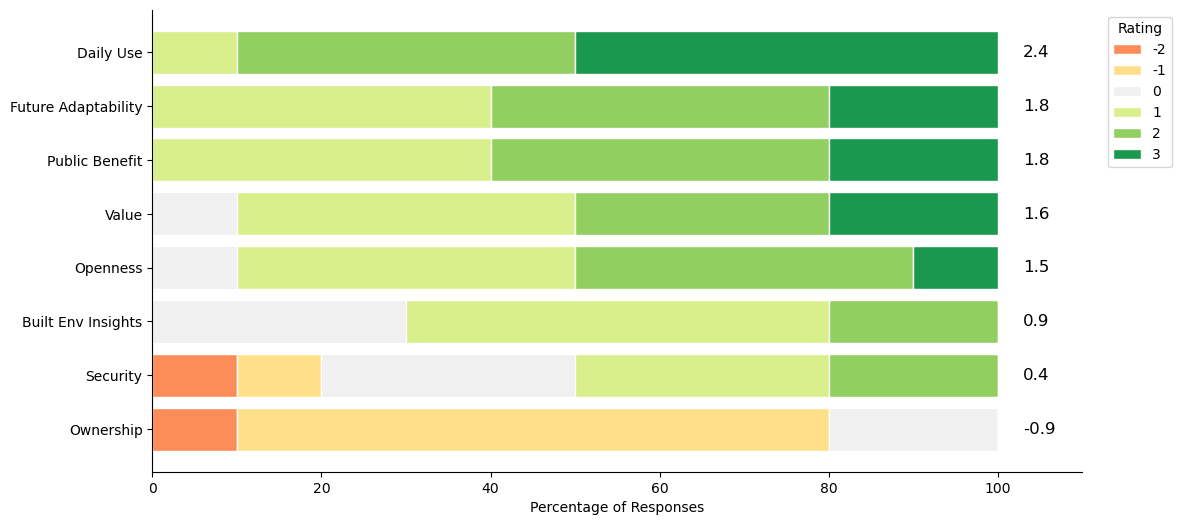

In [7]:
# Compute mean ratings and sort in descending order
mean_values = df.mean().sort_values(ascending=True)

# Count occurrences of each rating (1-7) for each question
response_counts = df.apply(lambda x: x.value_counts().sort_index()).fillna(0)
response_percentages = response_counts.div(response_counts.sum(axis=0), axis=1) * 100

# Sort response percentages accordingly
response_percentages_sorted = response_percentages[mean_values.index]

# Define colors
colors = {
    1: "#D73027", 2: "#FC8D59", 3: "#FEE08B", 4: "#F0F0F0",
    5: "#D9EF8B", 6: "#91CF60", 7: "#1A9850"
}

# Set up figure
fig, ax = plt.subplots(figsize=(12, 6))

# Stack bars for each response category
lefts = np.zeros(len(mean_values))  # Track cumulative position
for rating in sorted(response_percentages_sorted.index):  # Ensure order from 1 to 7
    ax.barh(mean_values.index, response_percentages_sorted.loc[rating], left=lefts, 
            color=colors[rating], edgecolor='white', label=str(rating-4) if rating not in ax.get_legend_handles_labels()[1] else "")
    lefts += response_percentages_sorted.loc[rating]

# Add mean values as markers
for i, (question, mean) in enumerate(mean_values.items()):
    ax.text(103, i, f"{(mean-4):.1f}", va="center", fontsize=12, color="black")

# Formatting
csfont = {'fontname':'Inter'}
hfont = {'fontname':'Helvetica'}

ax.set_xlim(0, 110)  # Extra space for mean values
ax.set_xlabel("Percentage of Responses", **csfont)
#ax.set_title("Diverging Stacked Bar Chart of Likert Scale Responses (Sorted by Mean)")
ax.legend(title="Rating", bbox_to_anchor=(1.02, 1), loc='upper left')
#ax.axvline(50, color='gray', linestyle="--", alpha=0.7)  # Midpoint reference

#hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

plt.show()
